In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
data = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/BitcoinPricePrediction.csv")
data.head()

,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
0,2013-04-01,93.0,106.0,92.2,104.0,52572,139256,48809,6695826,6.550211e+13,...,2592.0,64.987,8193.0,15.248,75756.0,19.962,0.867,10975275.0,481891.360000,118.0
1,2013-04-02,104.0,118.4,99.0,118.0,63095,175443,62276,6695826,6.184560e+13,...,4400.0,94.955,8193.0,17.192,91875.0,20.024,1.338,10988125.0,531299.503749,135.0
2,2013-04-03,118.0,147.0,110.0,135.0,63766,184209,69174,6695826,6.027037e+13,...,4478.0,102.533,8193.0,26.608,107142.0,19.987,1.596,10986575.0,538423.880210,132.1
3,2013-04-04,135.0,142.1,116.4,132.1,66738,221568,71753,6695826,5.527246e+13,...,4249.0,123.314,8193.0,24.681,108890.0,19.990,1.948,10995725.0,525157.600000,142.3
4,2013-04-05,132.1,144.9,130.2,142.3,61215,190067,69310,7005058,5.181545e+13,...,4348.0,125.183,8193.0,20.514,100034.0,19.833,1.432,10999925.0,606454.781556,142.6


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            3093 non-null   object 
 1   opening_price                   3093 non-null   float64
 2   highest_price                   3093 non-null   float64
 3   lowest_price                    3093 non-null   float64
 4   closing_price                   3093 non-null   float64
 5   transactions_in_blockchain      3093 non-null   int64  
 6   avg_block_size                  3093 non-null   int64  
 7   sent_by_adress                  3093 non-null   int64  
 8   avg_mining_difficulty           3093 non-null   int64  
 9   avg_hashrate                    3093 non-null   float64
 10  mining_profitability            3093 non-null   float64
 11  sent_coins_in_usd               3093 non-null   int64  
 12  avg_transaction_fees            30

In [16]:
data.describe()

,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,mining_profitability,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
count,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3.093000e+03,3.093000e+03,3093.000000,...,3.093000e+03,3093.000000,3093.000000,3093.000000,3.093000e+03,3093.000000,3093.000000,3.093000e+03,3.093000e+03,3093.000000
mean,7478.787423,7704.451859,7228.984028,7494.347559,212004.408018,644307.604591,315140.438733,5.416214e+12,3.923394e+19,211.641951,...,5.289076e+04,350.846155,35889.309787,44.134386,4.917852e+05,17.890455,4.084758,1.591747e+07,1.054620e+07,7509.615584
std,12404.192142,12790.358177,11965.543777,12425.151723,102204.862259,273438.916788,152655.587696,7.181598e+12,5.172006e+19,1003.429879,...,1.223717e+05,459.933644,30663.425155,56.718282,2.617263e+05,2.384311,5.462011,2.255772e+06,1.320106e+07,12445.065991
min,68.400000,75.000000,50.000000,68.400000,30170.000000,76067.000000,30829.000000,6.695826e+06,5.181545e+13,0.063700,...,8.893450e+02,0.091700,7300.000000,3.821000,4.840200e+04,13.144000,0.183000,1.097528e+07,3.099004e+05,68.400000
25%,427.100000,435.300000,417.100000,427.300000,106160.000000,410596.000000,173768.000000,4.764340e+10,3.506746e+17,0.241000,...,4.389000e+03,110.480000,18727.000000,8.707000,2.362800e+05,15.458000,0.718000,1.416458e+07,1.458738e+06,427.600000
50%,2541.600000,2617.500000,2472.400000,2545.400000,229295.000000,730092.000000,335962.000000,7.086595e+11,5.168519e+18,0.776000,...,1.559100e+04,206.481000,25897.000000,29.850000,5.161620e+05,18.639000,1.447000,1.640969e+07,5.461151e+06,2558.400000
75%,8820.100000,9040.300000,8610.800000,8821.600000,296817.000000,880952.000000,428831.000000,9.985348e+12,7.263994e+19,2.719000,...,3.674800e+04,453.410000,39572.772727,49.354000,6.728410e+05,19.834000,5.547000,1.786376e+07,1.478203e+07,8829.200000
max,63544.200000,64778.000000,62067.500000,63540.900000,490459.000000,998092.000000,730199.000000,2.504649e+13,1.976095e+20,13352.000000,...,1.932378e+06,5417.000000,363566.000000,616.867000,1.196069e+06,22.081000,43.580000,1.881966e+07,8.017224e+07,63540.900000


In [17]:
data.columns

Index(['Date', 'opening_price', 'highest_price', 'lowest_price',
       'closing_price', 'transactions_in_blockchain', 'avg_block_size',
       'sent_by_adress', 'avg_mining_difficulty', 'avg_hashrate',
       'mining_profitability', 'sent_coins_in_usd', 'avg_transaction_fees',
       'median_transaction_fees', 'avg_block_time', 'avg_transaction_value',
       'median_transaction_value', 'tweets', 'google_trends',
       'active_addresses', 'top100_to_total_percentage', 'avg_fee_to_reward',
       'number_of_coins_in_circulation', 'miner_revenue',
       'next_day_closing_price'],
      dtype='object')

#Train Test Split

In [18]:
x,tx = train_test_split(data, random_state=2529)

#Principal Component Analysis

In [19]:
lx = x[['opening_price', 'highest_price', 'lowest_price','closing_price', 'transactions_in_blockchain', 'avg_block_size', 'sent_by_adress', 'avg_mining_difficulty', 'avg_hashrate', 'mining_profitability', 'sent_coins_in_usd', 'avg_transaction_fees', 'median_transaction_fees', 'avg_block_time', 'avg_transaction_value', 'median_transaction_value', 'tweets', 'google_trends', 'active_addresses', 'top100_to_total_percentage', 'avg_fee_to_reward', 'number_of_coins_in_circulation', 'miner_revenue']].values.tolist()
ntx = tx[['opening_price', 'highest_price', 'lowest_price','closing_price', 'transactions_in_blockchain', 'avg_block_size', 'sent_by_adress', 'avg_mining_difficulty', 'avg_hashrate', 'mining_profitability', 'sent_coins_in_usd', 'avg_transaction_fees', 'median_transaction_fees', 'avg_block_time', 'avg_transaction_value', 'median_transaction_value', 'tweets', 'google_trends', 'active_addresses', 'top100_to_total_percentage', 'avg_fee_to_reward', 'number_of_coins_in_circulation', 'miner_revenue']].values.tolist()

scaler = StandardScaler()
scaler.fit(lx)

lx = scaler.transform(lx)
ntx = scaler.transform(ntx)

n = len(lx)
X = np.array(lx)
Xt = np.transpose(X)
E = (Xt @ X)/n
val,vect = np.linalg.eig(E)

idx = val.argsort()[::-1]
val = val[idx]
vect = vect[:, idx]
print(val)
print(np.shape(vect))

[1.31878917e+01 3.00239365e+00 2.32763388e+00 1.05142766e+00
 9.25445295e-01 7.51642666e-01 5.03371997e-01 3.46214193e-01
 2.57477091e-01 1.86766160e-01 1.20451157e-01 8.94751116e-02
 7.09285980e-02 5.48356026e-02 4.89297440e-02 2.75855999e-02
 2.48460444e-02 1.01942251e-02 5.47120385e-03 4.88182236e-03
 1.33724047e-03 6.38812205e-04 1.60520942e-04]
(23, 23)


#Least Square Approximator

In [38]:
ly = x[['next_day_closing_price']].values.tolist()
Y = np.zeros(n)

P = vect[:, :10]
R = X @ P
R = R.tolist()
for i in range(n):
  R[i].append(1)
  Y[i] = ly[i][0]
R = np.array(R)
Rt = np.transpose(R)
xtx = Rt @ R
xty = Rt @ Y
inx=np.linalg.inv(xtx)
C=inx @ xty

def pls(temp):
  J = np.array(temp)
  nJ = J @ P
  temp = nJ.tolist()
  temp.append(1)
  J = np.array(temp)
  return np.dot(J,C)

#Testing The Model

In [39]:
N = len(tx)
nty = tx[['next_day_closing_price']].values.tolist()

e=0
act = np.zeros(N)
prd = np.zeros(N)
for i in range(N):
  act[i] = nty[i][0]
  prd[i] = pls(ntx[i])
  j=act[i]-prd[i]
  e+=(j*j)

e=np.sqrt(e/N)
print('Root Mean Square Error')
print(e)

Root Mean Square Error
929.7212749535236


#Visualization of Actual vs Predicted

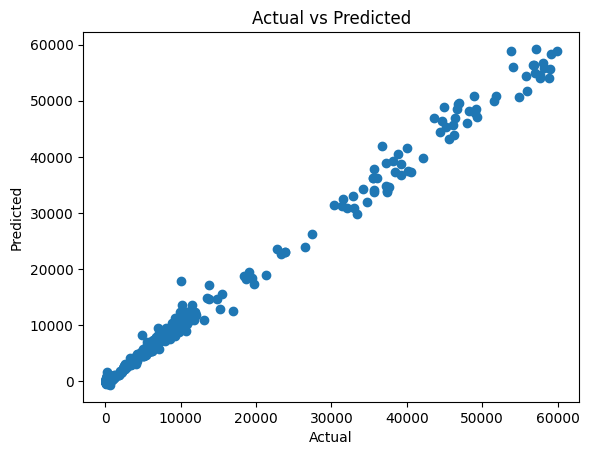

In [40]:
from matplotlib import pyplot as plt

plt.scatter(act,prd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()